In [1]:
#!pip3 install pandas
#!pip3 install seaborn
#!pip3 install matplotlib
#!pip3 install sklearn
#!pip3 install numpy
#!pip3 install warnings

# Covid patients number prediction

## Importing Dependencies

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

np.set_printoptions(suppress=True)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from math import sqrt

In [3]:
data = pd.read_excel("Broj_zarazenih_Bioinzenjering_i_Bioinformatika.xlsx")
data['DATE'] = pd.to_datetime(data['DATE'])
data.set_index('DATE',inplace=True)

data.head()

,TOTAL CASES
DATE,
2020-03-15,214
2020-03-16,387
2020-03-17,422
2020-03-18,534
2020-03-19,713


In [4]:
data.tail(15)

,TOTAL CASES
DATE,
2021-03-01,3243
2021-03-02,2774
2021-03-03,2771
2021-03-04,2705
2021-03-05,2749
2021-03-06,1524
2021-03-07,795
2021-03-08,3708
2021-03-09,3418


In [5]:
data.shape

(366, 1)

In [6]:
data = pd.read_excel("Broj_zarazenih_Bioinzenjering_i_Bioinformatika.xlsx")
data['DATE'] = pd.to_datetime(data.DATE)
data=data.groupby(pd.Grouper(key='DATE', axis=0, freq='3D')).sum()
data

,TOTAL CASES
DATE,
2020-03-15,1023
2020-03-18,1909
2020-03-21,2283
2020-03-24,3757
2020-03-27,3045
...,...
2021-03-01,8788
2021-03-04,6978
2021-03-07,7921


In [7]:
data.tail(25)

,TOTAL CASES
DATE,
2020-12-31,3324
2021-01-03,6766
2021-01-06,6552
2021-01-09,5335
2021-01-12,6901
2021-01-15,4090
2021-01-18,8080
2021-01-21,6422
2021-01-24,7023


In [8]:
print("Data shape: ", data.shape)

Data shape:  (122, 1)


In [9]:
data.describe()

,TOTAL CASES
count,122.000000
mean,6650.721311
std,9823.262225
min,191.000000
25%,1223.000000
50%,4190.000000
75%,7335.500000
max,60081.000000


In [10]:
data.isnull().sum()

TOTAL CASES    0
dtype: int64

<AxesSubplot:xlabel='DATE'>

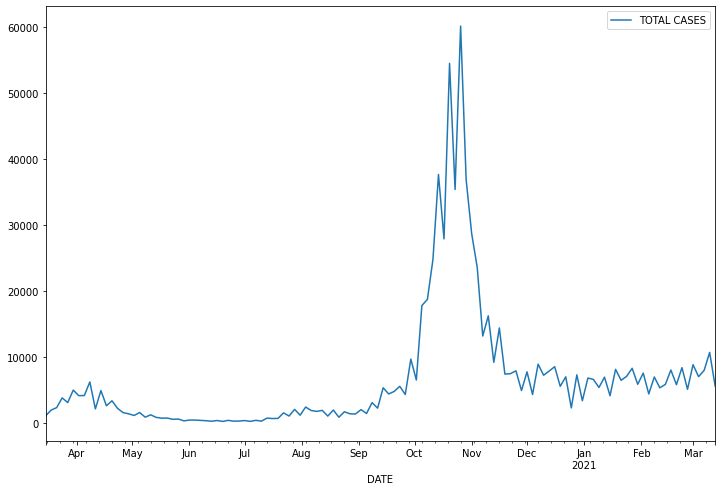

In [11]:
data.columns = ['TOTAL CASES']
data.plot(figsize = (12,8))

# LSTM

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose

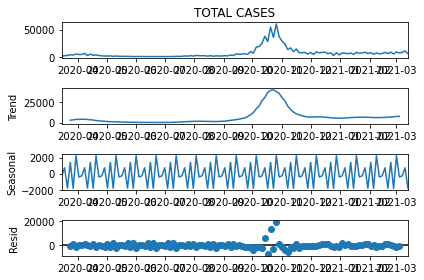

In [13]:
results = seasonal_decompose(data['TOTAL CASES'])
results.plot();

In [14]:
len(data)

122

In [15]:
# 15 is the last 3 months, so I want train to be 74-15
# 30 is the last 3 months, so I want train to be 122-30
train = data.iloc[:92]
test = data.iloc[92:]

In [16]:
scaler = MinMaxScaler()

In [17]:
data.head(), data.tail()

(            TOTAL CASES
 DATE                   
 2020-03-15         1023
 2020-03-18         1909
 2020-03-21         2283
 2020-03-24         3757
 2020-03-27         3045,
             TOTAL CASES
 DATE                   
 2021-03-01         8788
 2021-03-04         6978
 2021-03-07         7921
 2021-03-10        10645
 2021-03-13         5530)

In [18]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [19]:
scaled_train[:10]

array([[0.01389214],
       [0.02868592],
       [0.03493071],
       [0.05954249],
       [0.04765403],
       [0.07921189],
       [0.06516948],
       [0.06550342],
       [0.09988312],
       [0.03170813]])

In [20]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [21]:
# define generator
# number of input is defined like so:
# 366/5 = 122 
# 122/12 = 10.15 == 10
n_input = 10
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size = 1)

In [22]:
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n{y}')

Given the Array: 
[0.01389214 0.02868592 0.03493071 0.05954249 0.04765403 0.07921189
 0.06516948 0.06550342 0.09988312 0.03170813]
Predict this y: 
[[0.07807647]]


In [23]:
scaled_train[10]

array([0.07807647])

In [24]:
X.shape

(1, 10, 1)

In [25]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [26]:
# define model
model = Sequential()
model.add(LSTM(200, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 200)               161600    
                                                                 
 dense (Dense)               (None, 1)                 201       
                                                                 
Total params: 161,801
Trainable params: 161,801
Non-trainable params: 0
_________________________________________________________________


In [28]:
# fit model
model.fit(generator, epochs = 100)

Epoch 1/100
82/82 [==============================] - 2s 6ms/step - loss: 0.0268
Epoch 2/100
82/82 [==============================] - 1s 6ms/step - loss: 0.0190
Epoch 3/100
82/82 [==============================] - 1s 6ms/step - loss: 0.0145
Epoch 4/100
82/82 [==============================] - 1s 6ms/step - loss: 0.0145
Epoch 5/100
82/82 [==============================] - 1s 6ms/step - loss: 0.0132
Epoch 6/100
82/82 [==============================] - 1s 6ms/step - loss: 0.0121
Epoch 7/100
82/82 [==============================] - 1s 6ms/step - loss: 0.0104
Epoch 8/100
82/82 [==============================] - 1s 6ms/step - loss: 0.0091
Epoch 9/100
82/82 [==============================] - 1s 6ms/step - loss: 0.0088
Epoch 10/100
82/82 [==============================] - 1s 6ms/step - loss: 0.0093
Epoch 11/100
82/82 [==============================] - 1s 6ms/step - loss: 0.0068
Epoch 12/100
82/82 [==============================] - 1s 6ms/step - loss: 0.0081
Epoch 13/100
82/82 [=================

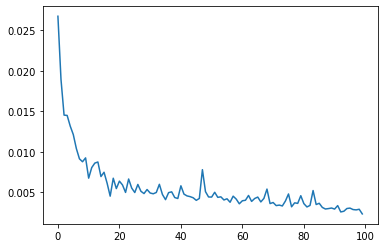

In [29]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)), loss_per_epoch)

In [30]:
last_train_batch = scaled_train[-10:]

In [31]:
last_train_batch = last_train_batch.reshape((1,n_input,n_features))

In [32]:
model.predict(last_train_batch)

1/1 [==============================] - 0s 171ms/step


array([[0.12664498]], dtype=float32)

In [33]:
scaled_test[0]

array([0.13848723])

In [34]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1,n_input,n_features))

for i in range(len(test)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred)
    
    # use the prediction to update the batch and move the first value
    current_batch = np.append(current_batch[:,1:,:], [[current_pred]], axis=1)

1/1 [==============================] - 0s 18ms/step


In [35]:
test_predictions

[array([0.12664498], dtype=float32),
 array([0.16356984], dtype=float32),
 array([0.19367349], dtype=float32),
 array([0.2453865], dtype=float32),
 array([0.31010583], dtype=float32),
 array([0.36850336], dtype=float32),
 array([0.4416473], dtype=float32),
 array([0.52752584], dtype=float32),
 array([0.61325514], dtype=float32),
 array([0.66688454], dtype=float32),
 array([0.68737185], dtype=float32),
 array([0.6705774], dtype=float32),
 array([0.5851718], dtype=float32),
 array([0.44727552], dtype=float32),
 array([0.28623366], dtype=float32),
 array([0.21976662], dtype=float32),
 array([0.20500894], dtype=float32),
 array([0.18635163], dtype=float32),
 array([0.16956806], dtype=float32),
 array([0.1556767], dtype=float32),
 array([0.1417008], dtype=float32),
 array([0.12931141], dtype=float32),
 array([0.1191241], dtype=float32),
 array([0.11259444], dtype=float32),
 array([0.11580782], dtype=float32),
 array([0.11756064], dtype=float32),
 array([0.11738755], dtype=float32),
 array([

In [36]:
test.head()

,TOTAL CASES
DATE,
2020-12-16,8485
2020-12-19,5512
2020-12-22,6953
2020-12-25,2238
2020-12-28,7250


<AxesSubplot:xlabel='DATE'>

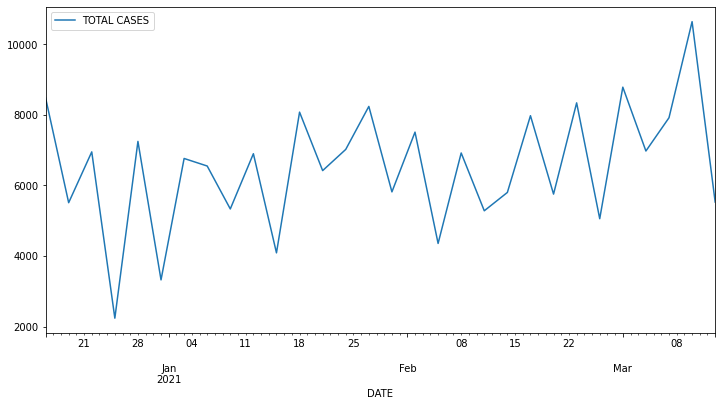

In [37]:
true_predictions = scaler.inverse_transform(test_predictions)
test.plot(figsize=(12,6))

In [38]:
test['Predictions'] = true_predictions

<AxesSubplot:xlabel='DATE'>

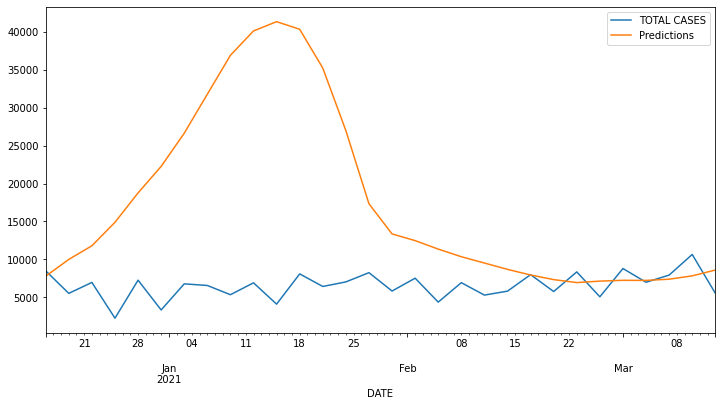

In [39]:
test.plot(figsize=(12,6))

In [40]:
from math import sqrt
rmse = sqrt(mean_squared_error(test['TOTAL CASES'], test['Predictions']))
print(rmse)

16090.428791195429


# Stationarity check

In [41]:
data = pd.read_excel("Broj_zarazenih_Bioinzenjering_i_Bioinformatika.xlsx")
data['DATE'] = pd.to_datetime(data['DATE'])
data.set_index('DATE',inplace=True)

data = data.dropna()

data

,TOTAL CASES
DATE,
2020-03-15,214
2020-03-16,387
2020-03-17,422
2020-03-18,534
2020-03-19,713
...,...
2021-03-11,3508
2021-03-12,3727
2021-03-13,2142


In [42]:
data = pd.read_excel("Broj_zarazenih_Bioinzenjering_i_Bioinformatika.xlsx")
data['DATE'] = pd.to_datetime(data.DATE)
data=data.groupby(pd.Grouper(key='DATE', axis=0, freq='5D')).sum()
data

,TOTAL CASES
DATE,
2020-03-15,2270
2020-03-20,4140
2020-03-25,5607
2020-03-30,8107
2020-04-04,6634
...,...
2021-02-23,12683
2021-02-28,12211
2021-03-05,12194


<AxesSubplot:xlabel='DATE'>

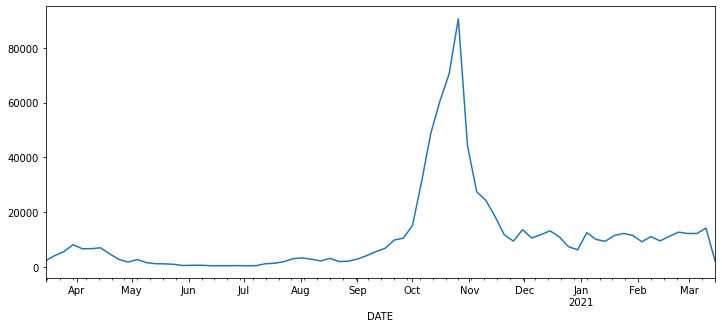

In [43]:
data['TOTAL CASES'].plot(figsize=(12,5))

In [44]:
from statsmodels.tsa.stattools import adfuller
adftest = adfuller(data)
print('pvalue of adfuller test is: ', adftest[1])
# < 0.05 --> stationaru
# > 0.05 non stationary

pvalue of adfuller test is:  0.10934750041868058


In [45]:
data1 = data.diff().dropna()

<AxesSubplot:xlabel='DATE'>

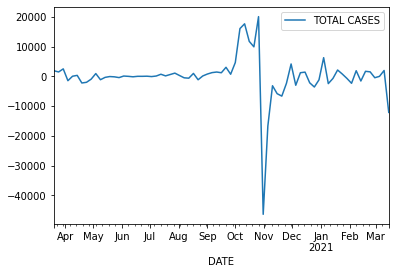

In [46]:
data1.plot()

In [47]:
from statsmodels.tsa.stattools import adfuller
adftest = adfuller(data1)
print('pvalue of adfuller test is: ', adftest[1])
# < 0.05 --> stationaru
# > 0.05 non stationary

pvalue of adfuller test is:  4.713419056092216e-09


In [48]:
data2 =np.log(data)

<AxesSubplot:xlabel='DATE'>

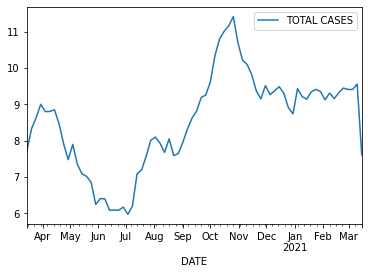

In [49]:
data2.plot()

In [50]:
from statsmodels.tsa.stattools import adfuller
adftest = adfuller(data2)
print('pvalue of adfuller test is: ', adftest[1])
# < 0.05 --> stationaru
# > 0.05 non stationary

pvalue of adfuller test is:  0.4872431353831758


In [51]:
data3 =data2.diff().dropna()

<AxesSubplot:xlabel='DATE'>

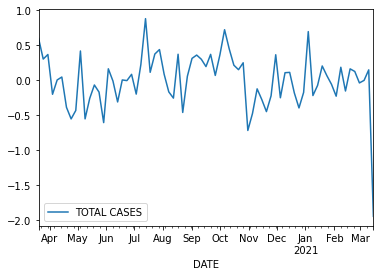

In [52]:
data3.plot()

In [53]:
from statsmodels.tsa.stattools import adfuller
adftest = adfuller(data3)
print('pvalue of adfuller test is: ', adftest[1])
# < 0.05 --> stationaru
# > 0.05 non stationary

pvalue of adfuller test is:  0.334096037877259


In [54]:
data4 =data.shift(1)/data

<AxesSubplot:xlabel='DATE'>

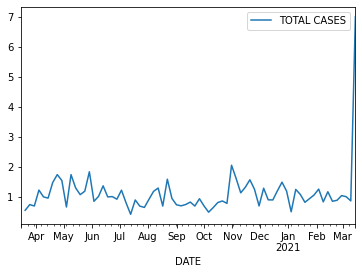

In [55]:
data4.plot()

In [56]:
from statsmodels.tsa.stattools import adfuller
adftest = adfuller(data3)
print('pvalue of adfuller test is: ', adftest[1])
# < 0.05 --> stationaru
# > 0.05 non stationary

pvalue of adfuller test is:  0.334096037877259


In [57]:
data_log = np.sqrt(data['TOTAL CASES'])

In [58]:
data_diff = data_log.diff().dropna()

In [59]:
from statsmodels.tsa.stattools import adfuller
adftest = adfuller(data_diff)
print('pvalue of adfuller test is: ', adftest[1])
# < 0.05 --> stationaru
# > 0.05 non stationary

pvalue of adfuller test is:  0.1235230196630544


<AxesSubplot:xlabel='DATE'>

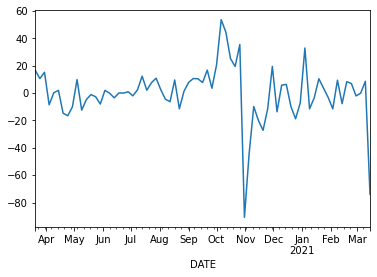

In [60]:
data_diff.plot()

In [61]:
len(data_diff)

73

In [62]:
data_diff

DATE
2020-03-20    16.698315
2020-03-25    10.537072
2020-03-30    15.158977
2020-04-04    -8.589510
2020-04-09     0.190080
                ...    
2021-02-23     6.883307
2021-02-28    -2.115433
2021-03-05    -0.076948
2021-03-10     8.548341
2021-03-15   -74.030377
Freq: 5D, Name: TOTAL CASES, Length: 73, dtype: float64